### Telecom Churn - ML Group Case Study : Shaitender Singh, PanduRanga Reddy

## Step 1 Business Understanding

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers
and actively switch from one operator to another. In this highly competitive market,
the telecommunications industry experiences an average of 15-25% annual churn rate. 
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, 
customer retention has now become even more important than customer acquisition.


For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


### Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September.
The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, 
understanding the typical customer behaviour during churn will be helpful.



### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly,
but rather over a period of time (this is especially applicable to high-value customers).
In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase,
the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned.
You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window,
the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


## Step 2 Data Understanding

In [1]:
# import  library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# reading the input data and preview
tel_churn= pd.read_csv('telecom_churn_data.csv')
tel_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
tel_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Step 3 Data Preparation,Cleaning, Missing Values & Imputation

In [4]:
#checking the missing value percentage
missing_cols = tel_churn.columns[100*(tel_churn.isnull().sum()/tel_churn.shape[0]) > 70]
round(tel_churn[missing_cols].isnull().sum()/tel_churn[missing_cols].shape[0], 2)*100

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

In [5]:
#droping relevant cols from the data set :-
irrelavant_cols = ['mobile_number',
                   'circle_id',
                   'last_date_of_month_6',
                   'last_date_of_month_7',
                   'last_date_of_month_8',
                   'last_date_of_month_9',
                   'date_of_last_rech_6',
                   'date_of_last_rech_7',
                   'date_of_last_rech_8',
                   'date_of_last_rech_9',
                   'date_of_last_rech_data_6',
                   'date_of_last_rech_data_7',
                   'date_of_last_rech_data_8',
                   'date_of_last_rech_data_9'                   
            ]

tel_churn = tel_churn.drop(irrelavant_cols, axis=1)

#checking the missing value percentage
missing_cols = tel_churn.columns[100*(tel_churn.isnull().sum()/tel_churn.shape[0]) > 70]
round(tel_churn[missing_cols].isnull().sum()/tel_churn[missing_cols].shape[0], 2)*100

total_rech_data_6     75.0
total_rech_data_7     74.0
total_rech_data_8     74.0
total_rech_data_9     74.0
max_rech_data_6       75.0
max_rech_data_7       74.0
max_rech_data_8       74.0
max_rech_data_9       74.0
count_rech_2g_6       75.0
count_rech_2g_7       74.0
count_rech_2g_8       74.0
count_rech_2g_9       74.0
count_rech_3g_6       75.0
count_rech_3g_7       74.0
count_rech_3g_8       74.0
count_rech_3g_9       74.0
av_rech_amt_data_6    75.0
av_rech_amt_data_7    74.0
av_rech_amt_data_8    74.0
av_rech_amt_data_9    74.0
arpu_3g_6             75.0
arpu_3g_7             74.0
arpu_3g_8             74.0
arpu_3g_9             74.0
arpu_2g_6             75.0
arpu_2g_7             74.0
arpu_2g_8             74.0
arpu_2g_9             74.0
night_pck_user_6      75.0
night_pck_user_7      74.0
night_pck_user_8      74.0
night_pck_user_9      74.0
fb_user_6             75.0
fb_user_7             74.0
fb_user_8             74.0
fb_user_9             74.0
dtype: float64

In [6]:
# important features  for getting the high-value customer
zero_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
            'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
            'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
            'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
            'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
            'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
            'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
            ]

tel_churn[zero_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315,0.914404,0.908764,0.890808,0.860968,0.025086,0.023034,0.020844,0.015971,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286,0.279772,0.287950,0.311885,0.345987,0.156391,0.150014,0.142863,0.125366,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


In [7]:
#lets impute zero_cols to zero value, as they are important feature for calculating high value customer
tel_churn[zero_cols] = tel_churn[zero_cols].replace(np.nan, 0)

In [8]:
tel_churn[zero_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,0.469025,0.522855,0.531075,0.461885,0.150702,0.158982,0.167442,0.170922,31.792048,32.406314,33.113011,32.387644,48.445409,51.393440,52.027022,49.961089,0.230002,0.232382,0.234632,0.223182,0.006310,0.005890,0.005490,0.00414,22.526009,22.856642,24.014520,25.990724,21.731907,21.969404,22.809665,24.292274
std,1.760541,1.924382,1.963417,1.669040,1.521915,1.659925,1.654565,1.371526,0.689999,0.755537,0.782059,0.774557,77.248778,78.342435,78.872739,78.818696,127.743863,132.629365,131.182609,127.804280,0.420836,0.422354,0.423771,0.416382,0.079185,0.076521,0.073892,0.06421,104.360309,106.457258,104.593649,118.562650,94.408718,96.746052,94.396902,96.437504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,14.000000,17.000000,17.000000,8.250000,17.000000,23.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4076.000000,4061.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


In [9]:
#checking the missing value percentage
missing_cols = tel_churn.columns[100*(tel_churn.isnull().sum()/tel_churn.shape[0]) > 5]
print(round(tel_churn[missing_cols].isnull().sum()/tel_churn[missing_cols].shape[0], 2)*100)
print(f'tel_churn shape: {tel_churn.shape}')

onnet_mou_8         5.0
onnet_mou_9         8.0
offnet_mou_8        5.0
offnet_mou_9        8.0
roam_ic_mou_8       5.0
roam_ic_mou_9       8.0
roam_og_mou_8       5.0
roam_og_mou_9       8.0
loc_og_t2t_mou_8    5.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_8    5.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_8    5.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_8    5.0
loc_og_t2c_mou_9    8.0
loc_og_mou_8        5.0
loc_og_mou_9        8.0
std_og_t2t_mou_8    5.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_8    5.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_8    5.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_8    5.0
std_og_t2c_mou_9    8.0
std_og_mou_8        5.0
std_og_mou_9        8.0
isd_og_mou_8        5.0
isd_og_mou_9        8.0
spl_og_mou_8        5.0
spl_og_mou_9        8.0
og_others_8         5.0
og_others_9         8.0
loc_ic_t2t_mou_8    5.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_8    5.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_8    5.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_8        5.0
loc_ic_mou_9    

In [10]:
tel_churn.shape

(99999, 212)

In [11]:
#Imputation Using Multivariate Imputation by Chained Equation (MICE)
#import sys
#from impyute.imputation.cs import mice

# start the MICE training
#imputed_training=mice(tel_churn.values)

In [12]:
#imputing missing values with median values using SimpleImputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
churn_impute = pd.DataFrame(columns= tel_churn.columns,data=imputer.fit_transform(tel_churn))

In [13]:
churn_impute.head()
#tel_churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,21

In [14]:
#check the missing percentage
print(round(churn_impute.isnull().sum()/churn_impute.shape[0], 2)*100)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [15]:
zero_cols=churn_impute.columns[(churn_impute == 0).all()]
print(zero_cols) 

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [16]:
# Let's remove these zero cols. 
churn_impute.drop(zero_cols,axis=1,inplace=True)

In [17]:
#check the information of df post imputation
churn_impute.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 201 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   arpu_9              float64
 4   onnet_mou_6         float64
 5   onnet_mou_7         float64
 6   onnet_mou_8         float64
 7   onnet_mou_9         float64
 8   offnet_mou_6        float64
 9   offnet_mou_7        float64
 10  offnet_mou_8        float64
 11  offnet_mou_9        float64
 12  roam_ic_mou_6       float64
 13  roam_ic_mou_7       float64
 14  roam_ic_mou_8       float64
 15  roam_ic_mou_9       float64
 16  roam_og_mou_6       float64
 17  roam_og_mou_7       float64
 18  roam_og_mou_8       float64
 19  roam_og_mou_9       float64
 20  loc_og_t2t_mou_6    float64
 21  loc_og_t2t_mou_7    float64
 22  loc_og_t2t_mou_8    float64
 23  loc_og_t2t_mou_9    float64
 24  loc_og_t2m_mou_6    float64

In [18]:
# renaming columns to make it standard throughout dataframe
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
churn_impute.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [19]:
# lets calculate the total data recharge amount for 6 and 7 
churn_impute['total_data_rech_6'] = churn_impute['total_rech_data_6'] * churn_impute['av_rech_amt_data_6']
churn_impute['total_data_rech_7'] = churn_impute['total_rech_data_7'] * churn_impute['av_rech_amt_data_7']

In [20]:
#average recharge done by customer in 6 and 7

churn_impute['avg_amt_data_6'] = churn_impute['total_rech_amt_6'] + churn_impute['total_data_rech_6']
churn_impute['avg_amt_data_7'] = churn_impute['total_rech_amt_7'] + churn_impute['total_data_rech_7']

In [21]:
# calculate average recharge done by customer in 6 and 7
churn_impute['avg_month_rech_6_7'] = (churn_impute['avg_amt_data_6'] + churn_impute['avg_amt_data_7'])/2

#### Calulate high value customer

In [22]:
# lets have look at the 70th percentile recharge amount and compute high value customer
print("Recharge amount at 70th percentile: {0}".format(churn_impute['avg_month_rech_6_7'].quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [23]:
churn_hv = churn_impute.loc[churn_impute['avg_month_rech_6_7'] >=  churn_impute['avg_month_rech_6_7'].quantile(0.7), :]
churn_hv.reset_index(inplace=True,drop=True)

In [24]:
print(f"High-Value Customers :{len(churn_hv)}")

High-Value Customers :30001


In [25]:
#dropping
churn_hv = churn_hv.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'avg_amt_data_6', 'avg_amt_data_7', 'avg_month_rech_6_7'], axis=1)

#### Tagging Churners-  Derived Feature

In [26]:
# let check data and dervive relevant information
churn_hv['total_internet_mb_9'] =  churn_hv['vol_2g_mb_9'] + churn_hv['vol_3g_mb_9']

In [27]:
# lets get total incoming and outgoing minutes of usage
churn_hv['total_calls_mou_9'] = churn_hv['total_ic_mou_9'] + churn_hv['total_og_mou_9']

In [28]:
#tagging churners - lets create a derrived feature those who have not used calls or internet in the 9th month are churned users
    
def tag_churn(elem):
    if elem['total_calls_mou_9'] == 0 and elem['total_internet_mb_9'] == 0:
        return 1
    else:
        return 0
    

# 0 - not churn, 1 - churn
churn_hv['churn'] = churn_hv.apply(tag_churn,axis=1)


#lets check the number of churn and not churn in data set
churn_hv['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [29]:
# fitler our all variables relating to last month
churn_hv = churn_hv.filter(regex='[^9]$', axis=1)
churn_hv.shape

(30001, 152)

#### Calculate and create new derived columns using difference of August and (Average of June and July)

In [30]:
col_names =['total_ic_mou',
            'total_rech_num',
            'total_rech_amt',
            'max_rech_amt',
            'total_rech_data',
            'max_rech_data',
            'av_rech_amt_data',
            'vol_2g_mb',
            'vol_3g_mb',
            'roam_ic_mou',
            'roam_og_mou',
            'loc_og_mou',
            'arpu',
            'onnet_mou',
            'offnet_mou',
            'loc_ic_mou',
            'std_ic_mou',          
            'isd_ic_mou',
            'spl_ic_mou',
            'std_og_mou',
            'isd_og_mou',
            'spl_og_mou',
            'total_og_mou']
#### looping and creating diff columns using formula diff => 8month - ((7month+6month)/2) 

for elem in col_names:
    churn_hv[f'{elem}_diff'] = churn_hv[f'{elem}_8'] - ((churn_hv[f'{elem}_7'] + churn_hv[f'{elem}_6'])/2)

In [31]:
#checking the information 
churn_hv.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 175 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   onnet_mou_6            float64
 4   onnet_mou_7            float64
 5   onnet_mou_8            float64
 6   offnet_mou_6           float64
 7   offnet_mou_7           float64
 8   offnet_mou_8           float64
 9   roam_ic_mou_6          float64
 10  roam_ic_mou_7          float64
 11  roam_ic_mou_8          float64
 12  roam_og_mou_6          float64
 13  roam_og_mou_7          float64
 14  roam_og_mou_8          float64
 15  loc_og_t2t_mou_6       float64
 16  loc_og_t2t_mou_7       float64
 17  loc_og_t2t_mou_8       float64
 18  loc_og_t2m_mou_6       float64
 19  loc_og_t2m_mou_7       float64
 20  loc_og_t2m_mou_8       float64
 21  loc_og_t2f_mou_6       float64
 22  loc_og_t2f_mou_7     

In [32]:
# check the derived diff columns 
churn_hv.filter(regex='diff', axis=1).describe()

,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,arpu_diff,onnet_mou_diff,offnet_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-6.467768,-13.085795,-19.896683,-5.733637,-1.875878,-3.496201,-17.53764,-51.038557,-29.52829,-38.911683,-7.459544,-3.392863,-0.331985,-0.013833,-47.973531,-0.189665,0.093746,-67.437337
std,221.899902,6.755899,418.479122,136.893018,2.214561,78.343307,148.249896,256.114926,624.877555,65.972062,94.165541,212.92811,334.872321,308.19445,347.579120,179.429994,98.200314,56.736330,0.174520,427.726689,14.001271,18.088160,502.630069
min,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000,-1296.985000,-2410.835000,-3867.83000,-5811.052500,-5295.31500,-7094.390000,-3747.225000,-2777.350000,-5534.595000,-16.280000,-7127.425000,-619.650000,-1081.910000,-7213.410000
25%,-67.230000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-59.000000,-21.120000,-2.270000,0.000000,0.000000,-58.06500,-180.179500,-51.48500,-98.855000,-48.455000,-11.685000,0.000000,0.000000,-54.460000,0.000000,-2.750000,-168.025000
50%,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.53500,-40.754500,-3.19000,-10.915000,-3.270000,-0.655000,0.000000,0.000000,-0.640000,0.000000,0.000000,-14.625000
75%,44.280000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,32.67500,83.239000,20.01500,44.360000,38.320000,5.380000,0.000000,0.000000,9.355000,0.000000,1.310000,67.915000
max,3485.370000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000,2330.200000,3057.150000,4619.97500,12808.617000,6359.92000,12604.240000,3485.370000,3321.395000,3163.690000,4.450000,12715.480000,544.780000,747.620000,12768.705000


### Exploratory Data Analysis - Data Visualisation

###### Let's Visualize some variables and try to find out any patterns

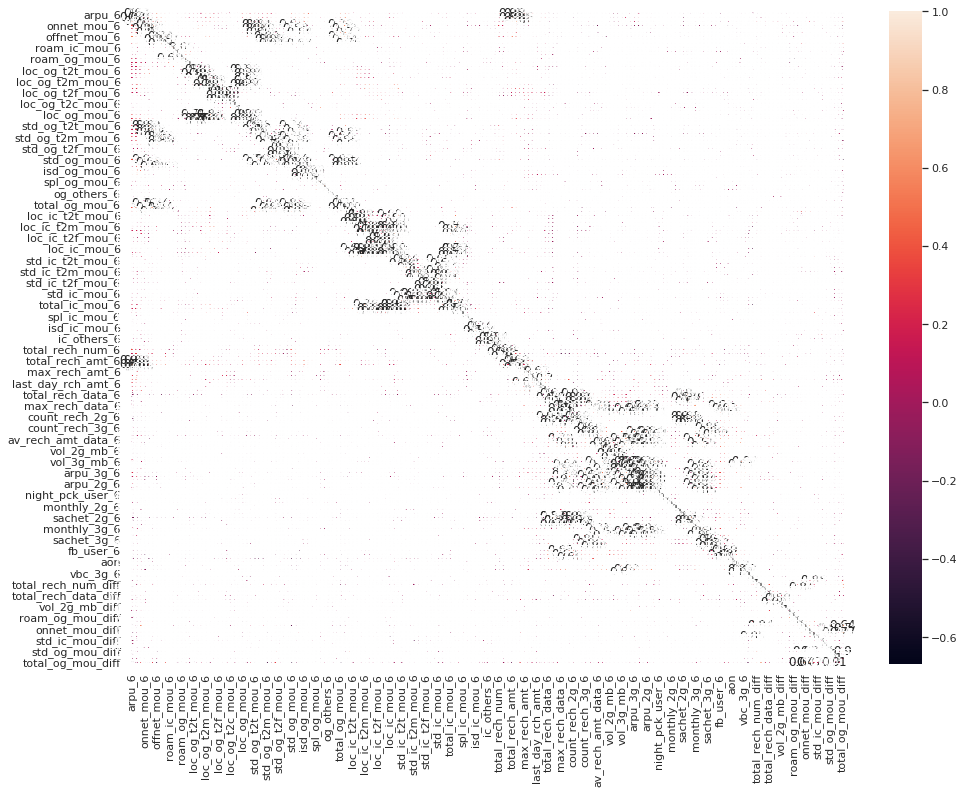

In [33]:
sns.set()
plt.figure(figsize=(16,12))
sns.heatmap(churn_hv.corr(),annot=True,linewidth = 0.5)
plt.show()

In [34]:
#sns.pairplot(churn_hv, hue='churn')
#plt.show()

### Univariate Analysis

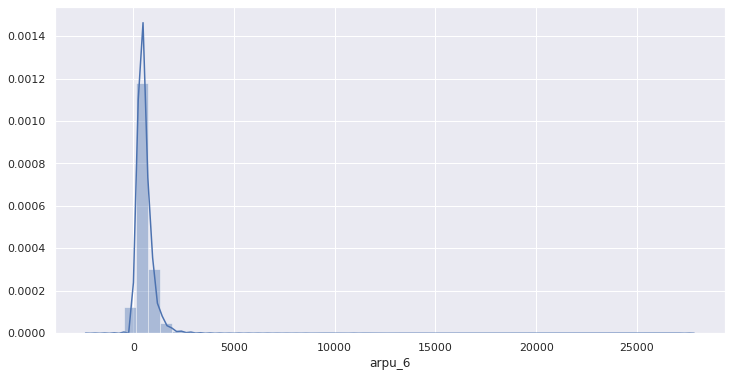

In [35]:
##visualzing arpu_6 using displot
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.distplot(churn_hv['arpu_6'])
plt.show()

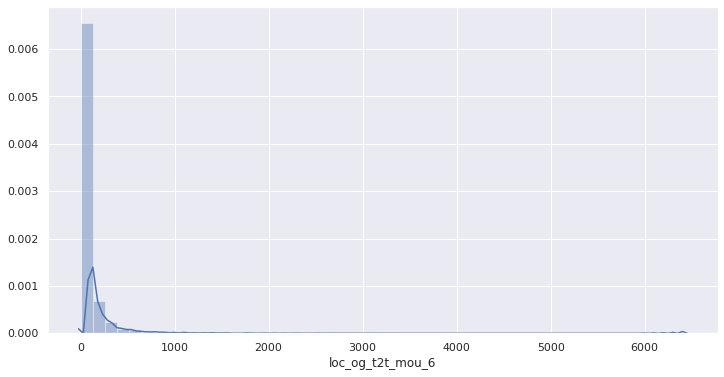

In [36]:
##visualzing loc_og_t2t_mou_6 using displot
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.distplot(churn_hv['loc_og_t2t_mou_6'])
plt.show()

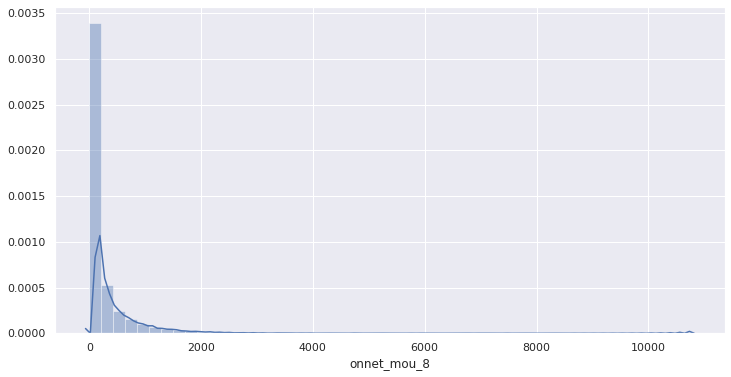

In [37]:
##visualzing onnet_mou_8 using displot
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.distplot(churn_hv['onnet_mou_8'])
plt.show()

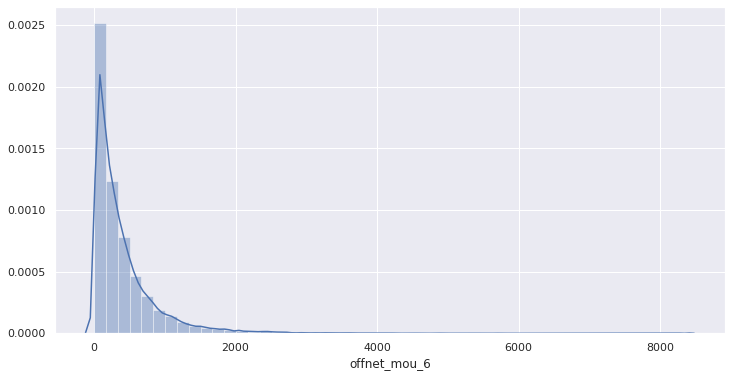

In [38]:
##visualzing offnet_mou_6 using displot
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.distplot(churn_hv['offnet_mou_6'])
plt.show()

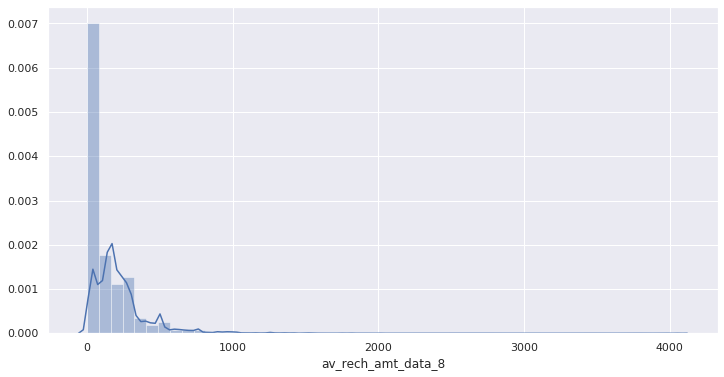

In [39]:
##visualzing av_rech_amt_data_8 using displot
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.distplot(churn_hv['av_rech_amt_data_8'])
plt.show()

### Bivariate Analysis

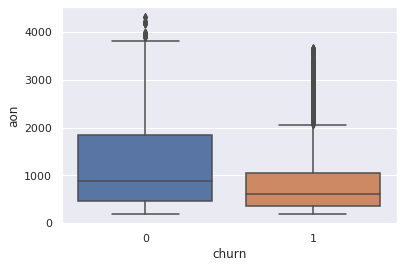

In [40]:
# ploting aon with churn
sns.boxplot(x='churn', y='aon', data=churn_hv)
plt.show()

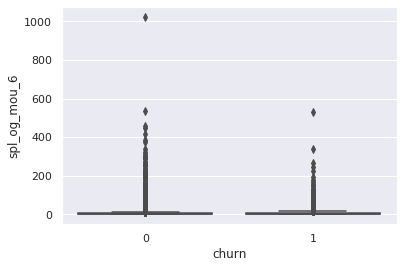

In [41]:
# ploting spl_og_mou_6 vs churn
sns.boxplot(x='churn', y='spl_og_mou_6', data=churn_hv)
plt.show()

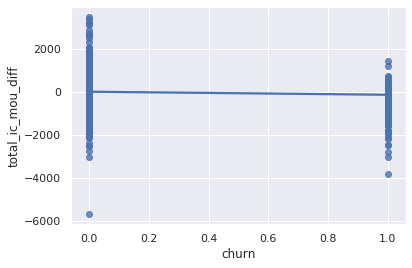

In [42]:
# ploting total_ic_mou_diff vs churn
sns.regplot(x='churn', y='total_ic_mou_diff', data=churn_hv)
plt.show()

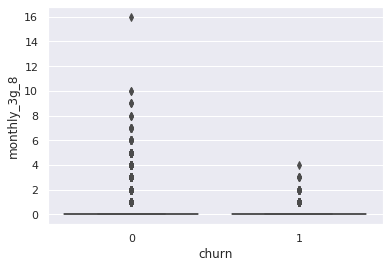

In [43]:
# ploting monthly_3g_8  vs churn
sns.boxplot(x='churn', y='monthly_3g_8', data=churn_hv)
plt.show()

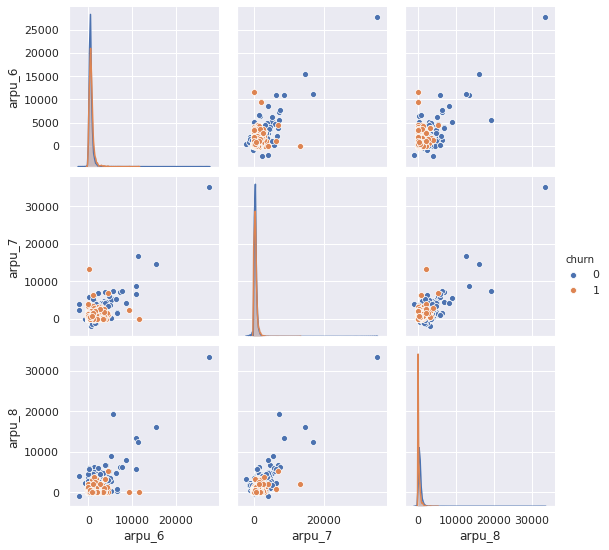

In [44]:
# ploting pair plot with arpu  vs churn
sns.pairplot(data=churn_hv[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')
plt.show()

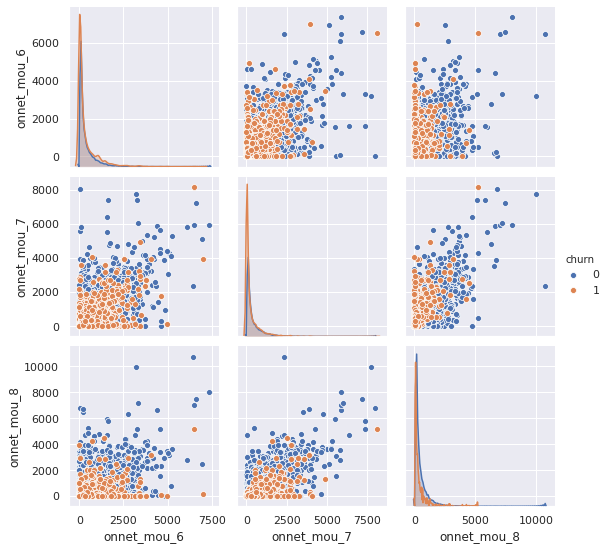

In [45]:
# ploting pair plot with onnet_mou  vs churn
sns.pairplot(data=churn_hv[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')
plt.show()

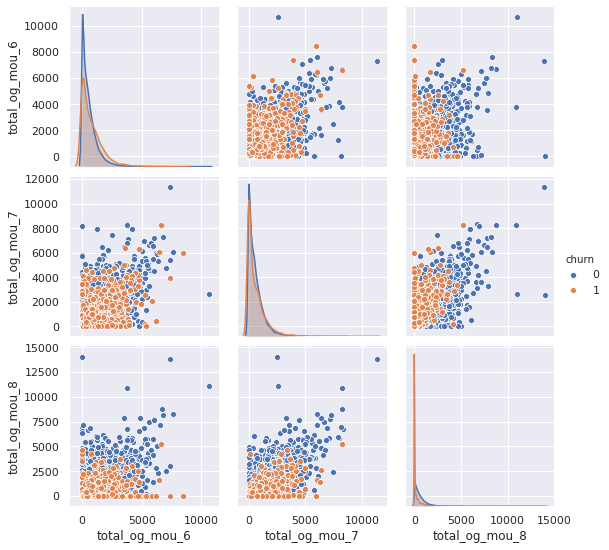

In [46]:
# ploting pair plot with total_og_mou vs churn
sns.pairplot(data=churn_hv[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')
plt.show()

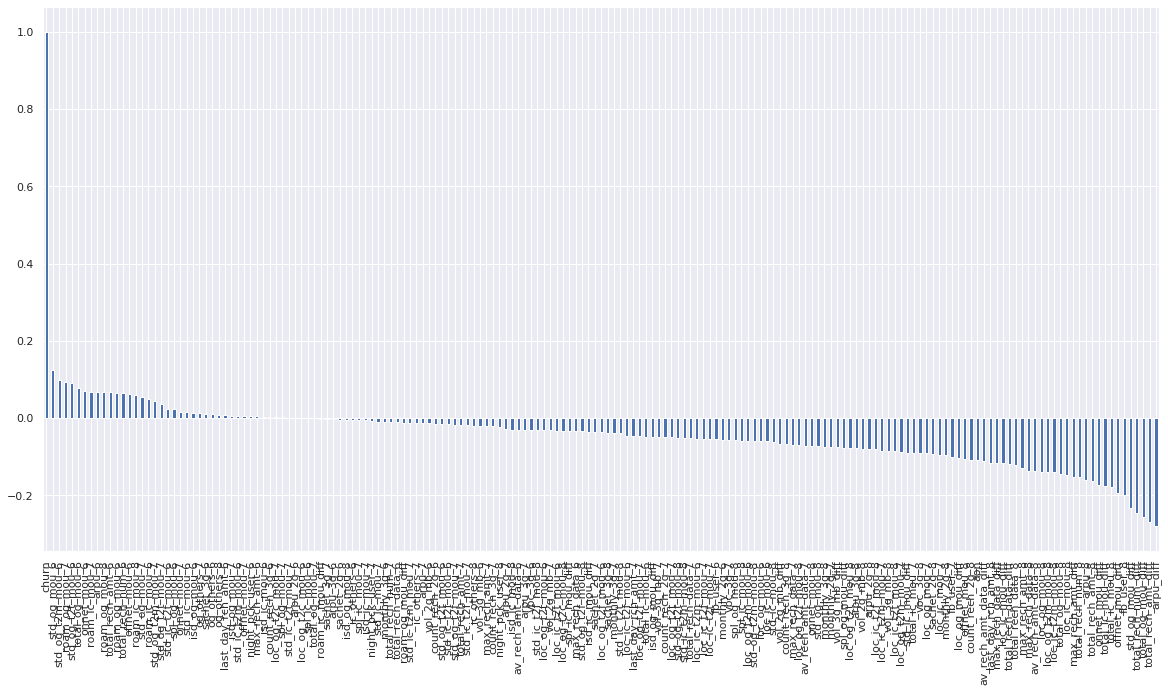

In [47]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
churn_hv.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

## Step 4 Buidling Models 

#### Feature engineering - StandardScaler and Outiler Removal using LocalOutlierFactor

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for outlier detection which is the default use case of this estimator in scikit-learn.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

#keeping all variable except predictor variable
X = churn_hv.drop(['churn'], axis=1)

#keeping predictor variable
y = churn_hv['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=42)
print(X_train.shape, y_train.shape)

(21000, 174) (21000,)


In [49]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(16727, 174) (16727,)


In [50]:
#check the values counts in churn class
y_train.value_counts()

0    15330
1     1397
Name: churn, dtype: int64

Looks like churn class is imbalanced, lets create some artifical point using Smote

#### Handling class imbalance.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

Informed Over Sampling: Synthetic Minority Over-sampling Technique,This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

Advantages:Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
No loss of useful information

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [52]:
#check the values counts in churn class
print(y_train.value_counts())
print(X_train.shape, y_train.shape)

1    15330
0    15330
Name: churn, dtype: int64
(30660, 174) (30660,)


### Part 1 Modelling : Without PCA 
##### 1. Logistic Regression with RFE

In [53]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# lets RFE select 15 most imp features for us
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe_features = list(X.columns[rfe.support_])
print("Important features selected by RFE ", rfe_features)

Important features selected by RFE  ['onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_data_8', 'total_ic_mou_diff']


In [55]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

In [56]:
# lets create a Logisctic Regression model on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
from sklearn.metrics import confusion_matrix ,roc_auc_score, f1_score
from imblearn.metrics import sensitivity_specificity_support


X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)

y_rfe_proba = lr.predict_proba(X_test_rfe)[:,1]

#Print model report:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(f'\nAccuracy : {lr.score(X_test_rfe, y_test)}')
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ",sensitivity, "\n", "Specificity: ", specificity, sep='')
print ("AUC Score: ", roc_auc_score(y_test, y_rfe_proba))

[[6815 1485]
 [ 141  560]]

Accuracy : 0.8193534051772026
Sensitivity: 0.7988587731811697
Specificity: 0.8210843373493976
AUC Score:  0.8813233246824674


In [60]:
# lets check classification report on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8300
           1       0.27      0.80      0.41       701

    accuracy                           0.82      9001
   macro avg       0.63      0.81      0.65      9001
weighted avg       0.92      0.82      0.86      9001



### Part 2 Modelling - With PCA

In [61]:
#Using PCA for efficiency
from sklearn.decomposition import PCA
pca = PCA()

#implement the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
# look at explained variance of PCA components
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100).sort_values(ascending=False)

173    100.00
132    100.00
143    100.00
142    100.00
141    100.00
140    100.00
139    100.00
138    100.00
137    100.00
136    100.00
135    100.00
134    100.00
133    100.00
131    100.00
145    100.00
172    100.00
129    100.00
128    100.00
127    100.00
126    100.00
125    100.00
124    100.00
123    100.00
122    100.00
121    100.00
120    100.00
144    100.00
130    100.00
146    100.00
147    100.00
171    100.00
170    100.00
169    100.00
168    100.00
167    100.00
166    100.00
165    100.00
164    100.00
163    100.00
162    100.00
161    100.00
160    100.00
159    100.00
158    100.00
157    100.00
156    100.00
155    100.00
154    100.00
153    100.00
152    100.00
151    100.00
150    100.00
149    100.00
148    100.00
119     99.99
118     99.99
117     99.99
116     99.98
115     99.97
114     99.97
113     99.95
112     99.94
111     99.92
110     99.91
109     99.89
108     99.86
107     99.84
106     99.81
105     99.77
104     99.74
103     99.70
102   

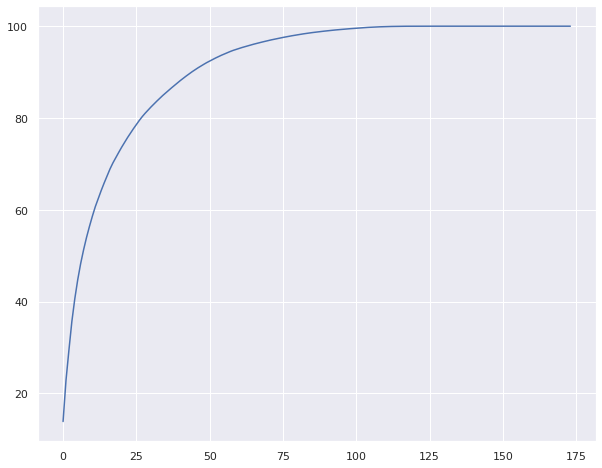

In [63]:
# plot feature variance
features = range(pca.n_components_)
variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(10,8)) 
plt.plot(variance)
plt.show()

###### Looks like 50 components are enough to describe 95% of the variance in the dataset
###### Above 35 components are describing 85% of variance, We will go with 35 for modelling.

In [64]:
#Using PCA
from sklearn.decomposition import IncrementalPCA
pca = PCA(n_components=35)

In [65]:
#implement the PCA on the train data
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

#Applying pca on the test data 
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(30660, 35)
(9001, 35)


For the prediction of churn customers we will be fitting variety of models and will select one which is the best predictor of churn. Models trained are,

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Boosting models - XGBoost Classifier

#### 1. Logistic Regression with PCA


In [66]:
#Training the LR model 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)


# predict churn on test data
y_pred = lr_model.predict(X_test_pca)
y_proba = lr_model.predict_proba(X_test_pca)[:,1]

print(f'\nAccuracy : {lr_model.score(X_test_pca, y_test)}')
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ",sensitivity, "\n", "Specificity: ", specificity, sep='')
print ("AUC Score: ", roc_auc_score(y_test, y_proba))


Accuracy : 0.8217975780468837
Sensitivity: 0.797432239657632
Specificity: 0.823855421686747
AUC Score:  0.8751992850145232


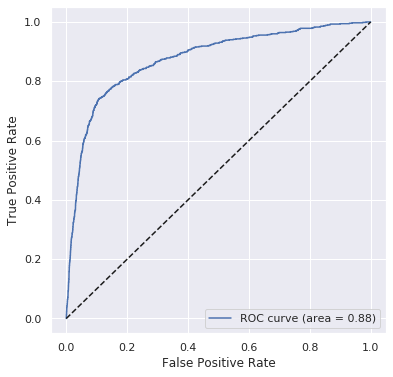

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_proba,
                                              drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, y_proba )
plt.figure(figsize=(6,6))  
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### 2. Logistic Regression - Hyperparameter tuning and PCA

In [68]:
# checking class balance again
y_train.value_counts()/y_train.shape

1    0.5
0    0.5
Name: churn, dtype: float64

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# logistic regression 
lr = LogisticRegression()

# create pipeline
steps = [("pca", pca),
         ("logistic", lr)
        ]

# compile pipeline
lr_pipeline = Pipeline(steps)

# hyperparameter 
params = {'pca__n_components': [30, 60], 
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
          'logistic__penalty': ['l1', 'l2']
         }

# create folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch 
model = GridSearchCV(estimator=lr_pipeline, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [70]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   33.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=35, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,...
                                                           multi_class='auto',
    

In [71]:
# cv results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.008671,0.129441,0.000000,0.000000,0.1,l1,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.745242,0.143198,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
2,1.304761,0.057426,0.028780,0.004994,0.1,l2,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.904331,0.905273,0.903083,0.909463,0.898824,0.904195,0.003435,10
3,2.119559,0.086037,0.032797,0.010801,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.910420,0.911959,0.908761,0.915500,0.904041,0.910136,0.003774,7
4,1.005213,0.073407,0.000000,0.000000,0.5,l1,30,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
5,1.726312,0.071857,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,1.331222,0.141321,0.025260,0.005336,0.5,l2,30,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.905181,0.905413,0.901953,0.909302,0.898784,0.904127,0.003545,13
7,2.181886,0.078044,0.038134,0.011222,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.910769,0.911925,0.908871,0.915612,0.903917,0.910219,0.003843,4
8,0.982334,0.047086,0.000000,0.000000,1,l1,30,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
9,1.774977,0.148943,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


In [72]:
# best parameters
print("Best hyperparameters: ", model.best_params_)
print("Best AUC: ", model.best_score_)

Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}
Best AUC:  0.9102718237479517


In [73]:
# predict churn on test data
y_pred = model.predict(X_test)
#check Accuracy
print(f'Accuracy : {model.score(X_test, y_test)}')
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ",sensitivity, "\n", "Specificity: ", specificity, sep='')
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print ("AUC Score: ", roc_auc_score(y_test, y_pred_prob))

Accuracy : 0.8783378306378151
Sensitivity: 0.7945791726105563
Specificity: 0.832289156626506
AUC Score:  0.8783378306378151


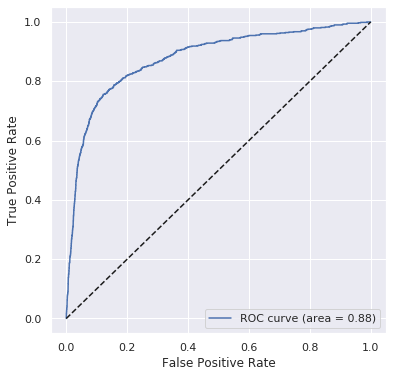

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred_prob,
                                              drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )
plt.figure(figsize=(6,6))  
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### 3. Decision Tree  - PCA and Hyperparameter Tuning

In [75]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

# create pipeline
steps = [("pca", pca),
         ("dt", dtree)
        ]

# compile pipeline
pipeline = Pipeline(steps)

# hyperparameter 
params = {'pca__n_components': [30, 60],          
          'dt__max_depth': range(5, 15, 5),
          'dt__min_samples_leaf': range(50, 150, 50),
          'dt__min_samples_split': range(50, 150, 50),
          'dt__criterion': ["entropy", "gini"]
         }

# create folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch 
model = GridSearchCV(estimator=pipeline, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=35, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features...
                                                               rand

In [76]:
# cv results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,param_dt__min_samples_leaf,param_dt__min_samples_split,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.757202,0.160139,0.022208,0.005279,entropy,5,50,50,30,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.883715,0.891318,0.882604,0.887172,0.879344,0.884831,0.004096,21
1,5.803249,0.178779,0.029995,0.008391,entropy,5,50,50,60,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.883304,0.891389,0.881086,0.889951,0.878577,0.884861,0.004994,20
2,3.242307,0.173453,0.025391,0.004578,entropy,5,50,100,30,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.884968,0.892032,0.881882,0.886482,0.879282,0.884929,0.004337,18
3,5.566394,0.151070,0.026371,0.005414,entropy,5,50,100,60,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.883083,0.891637,0.881395,0.889263,0.879127,0.884901,0.004761,19
4,2.850600,0.214199,0.031019,0.018089,entropy,5,100,50,30,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.883574,0.892363,0.878191,0.886518,0.880209,0.884171,0.004989,23
5,5.244868,0.219657,0.027624,0.004715,entropy,5,100,50,60,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.882285,0.891944,0.880857,0.887060,0.878688,0.884167,0.004762,24
6,2.602511,0.204365,0.020462,0.007729,entropy,5,100,100,30,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.885326,0.891263,0.884151,0.886204,0.879909,0.885371,0.003653,17
7,5.116213,0.165932,0.023471,0.002640,entropy,5,100,100,60,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.882298,0.891937,0.880754,0.887471,0.878961,0.884284,0.004764,22
8,3.713977,0.141077,0.022724,0.005231,entropy,10,50,50,30,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.915649,0.922951,0.914047,0.919677,0.912006,0.916866,0.003949,2
9,7.300291,0.221238,0.027024,0.007940,entropy,10,50,50,60,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.915597,0.919579,0.911506,0.922901,0.911676,0.916252,0.004453,4


In [77]:
#optimal accuracy score and hyperparameters
print("best accuracy", model.best_score_)
print(model.best_estimator_)

best accuracy 0.9171173091742484
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=30,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=10,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=50,
                                        min_samples_split=100,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)


In [78]:
# predict churn on test data
y_pred = model.predict(X_test)
#check Accuracy
print(f'Accuracy : {model.score(X_test, y_test)}')
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ",sensitivity, "\n", "Specificity: ", specificity, sep='')
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print ("AUC Score: ", metrics.roc_auc_score(y_test, y_pred_prob))

Accuracy : 0.8404541704621624
Sensitivity: 0.717546362339515
Specificity: 0.8436144578313253
AUC Score:  0.8404541704621624


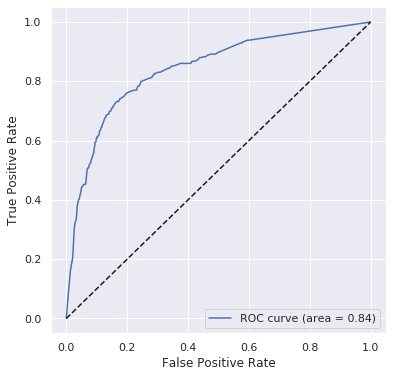

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred_prob,
                                              drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )
plt.figure(figsize=(6,6))  
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### 4. Random Forest - Hyperparameter Tuning and PCA

In [80]:
# Importing RandomForestClassifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs = -1)

# create pipeline
steps = [("pca", pca),
         ("forest", forest)
        ]

# compile pipeline
pipeline = Pipeline(steps)

# hyperparameter 
params = {'pca__n_components': [30, 60],          
          'forest__max_features': ['auto', 0.4],          
          'forest__criterion': ["entropy", "gini"]
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch
model = GridSearchCV(estimator=pipeline, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=35, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('forest',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_dept...
                                                               min_

In [81]:
# cv results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__criterion,param_forest__max_features,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.041764,0.307392,0.380202,0.018286,entropy,auto,30,"{'forest__criterion': 'entropy', 'forest__max_...",0.988116,0.988719,0.990021,0.989593,0.986454,0.988581,0.001253,5
1,55.852483,2.321360,0.467881,0.042291,entropy,auto,60,"{'forest__criterion': 'entropy', 'forest__max_...",0.991564,0.991354,0.992230,0.992169,0.989530,0.991369,0.000980,1
2,81.640813,0.732836,0.394282,0.024167,entropy,0.4,30,"{'forest__criterion': 'entropy', 'forest__max_...",0.988202,0.987902,0.989146,0.988880,0.986640,0.988154,0.000879,6
3,160.056996,2.035895,0.466963,0.067960,entropy,0.4,60,"{'forest__criterion': 'entropy', 'forest__max_...",0.990809,0.990627,0.991033,0.992089,0.989412,0.990794,0.000857,2
4,25.037159,0.737534,0.484805,0.044387,gini,auto,30,"{'forest__criterion': 'gini', 'forest__max_fea...",0.987443,0.988118,0.989597,0.989397,0.985357,0.987982,0.001537,7
5,38.513386,0.552627,0.461392,0.076463,gini,auto,60,"{'forest__criterion': 'gini', 'forest__max_fea...",0.990504,0.990184,0.991652,0.992004,0.988824,0.990634,0.001132,3
6,50.278663,1.613904,0.428164,0.045987,gini,0.4,30,"{'forest__criterion': 'gini', 'forest__max_fea...",0.987058,0.987054,0.988134,0.988688,0.984779,0.987143,0.001340,8
7,83.342791,4.889951,0.240105,0.113195,gini,0.4,60,"{'forest__criterion': 'gini', 'forest__max_fea...",0.989116,0.989499,0.989952,0.991426,0.987377,0.989474,0.001309,4


In [82]:
#best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9913694332427412
Best hyperparameters:  {'forest__criterion': 'entropy', 'forest__max_features': 'auto', 'pca__n_components': 60}


In [83]:
# predict churn on test data
y_pred = model.predict(X_test)
#check Accuracy
print(f'Accuracy : {model.score(X_test, y_test)}')
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ",sensitivity, "\n", "Specificity: ", specificity, sep='')
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print ("AUC Score: ", metrics.roc_auc_score(y_test, y_pred_prob))

Accuracy : 0.880470068576732
Sensitivity: 0.5092724679029957
Specificity: 0.9486746987951807
AUC Score:  0.880470068576732


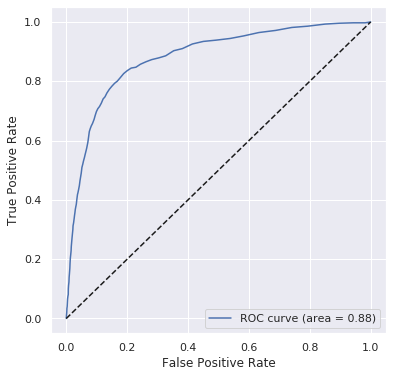

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred_prob,
                                              drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )
plt.figure(figsize=(6,6))  
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

##### 5. Boosting - XGBoost Classifier with PCA and hyperparameter tuning

In [85]:
# Importing XGBClassifier
from xgboost.sklearn import XGBClassifier

# Fitting the XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, objective='binary:logistic',
                    silent=True, nthread=1)

# create pipeline
steps = [("pca", pca),
         ("xgb", xgb)
        ]

# compile pipeline
pipeline = Pipeline(steps)

# hyperparameter 
params={'pca__n_components': [30, 60],       
        'xgb__gamma': [0.5, 1, 1.5, 2, 5],        
        'xgb__max_depth': [3, 4, 5]
        }


# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch
model = GridSearchCV(estimator=pipeline, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=35, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_...
                                                      reg_lambda=None,
                                

In [86]:
# cv results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_xgb__gamma,param_xgb__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.351333,0.170961,0.033855,0.004123,30,0.5,3,"{'pca__n_components': 30, 'xgb__gamma': 0.5, '...",0.895072,0.900468,0.896187,0.901599,0.893404,0.897346,0.003159,27
1,16.149072,0.296756,0.040967,0.001531,30,0.5,4,"{'pca__n_components': 30, 'xgb__gamma': 0.5, '...",0.908985,0.914280,0.908909,0.915384,0.908462,0.911204,0.002988,20
2,20.582625,0.239379,0.050359,0.002117,30,0.5,5,"{'pca__n_components': 30, 'xgb__gamma': 0.5, '...",0.923544,0.924472,0.922983,0.927710,0.920307,0.923803,0.002395,9
3,11.918001,0.118449,0.033680,0.000760,30,1,3,"{'pca__n_components': 30, 'xgb__gamma': 1, 'xg...",0.894795,0.900549,0.895478,0.901473,0.892989,0.897057,0.003343,30
4,15.922495,0.119446,0.041069,0.001966,30,1,4,"{'pca__n_components': 30, 'xgb__gamma': 1, 'xg...",0.908890,0.915075,0.909097,0.914987,0.909214,0.911452,0.002924,17
5,20.453014,0.193787,0.050605,0.001304,30,1,5,"{'pca__n_components': 30, 'xgb__gamma': 1, 'xg...",0.922851,0.924402,0.923429,0.927018,0.921276,0.923795,0.001904,10
6,11.963772,0.103131,0.032858,0.000644,30,1.5,3,"{'pca__n_components': 30, 'xgb__gamma': 1.5, '...",0.894930,0.900420,0.895640,0.901659,0.893335,0.897197,0.003249,29
7,15.988679,0.125434,0.042968,0.004421,30,1.5,4,"{'pca__n_components': 30, 'xgb__gamma': 1.5, '...",0.909240,0.914616,0.908790,0.915239,0.908590,0.911295,0.002980,18
8,20.568853,0.187897,0.056500,0.004633,30,1.5,5,"{'pca__n_components': 30, 'xgb__gamma': 1.5, '...",0.923687,0.924587,0.923797,0.927521,0.920377,0.923994,0.002281,8
9,12.443251,0.318314,0.036992,0.002894,30,2,3,"{'pca__n_components': 30, 'xgb__gamma': 2, 'xg...",0.894905,0.900865,0.895710,0.901726,0.893106,0.897263,0.003410,28


In [87]:
#best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9294213963811583
Best hyperparameters:  {'pca__n_components': 60, 'xgb__gamma': 1.5, 'xgb__max_depth': 5}


In [88]:
# predict churn on test data
y_pred = model.predict(X_test)
#check Accuracy
print(f'Accuracy : {model.score(X_test, y_test)}')
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ",sensitivity, "\n", "Specificity: ", specificity, sep='')
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print ("AUC Score: ", metrics.roc_auc_score(y_test, y_pred_prob))

Accuracy : 0.8746112266469588
Sensitivity: 0.7417974322396577
Specificity: 0.8736144578313253
AUC Score:  0.8746112266469588


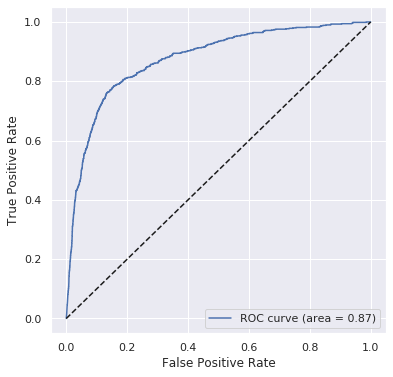

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred_prob,
                                              drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )
plt.figure(figsize=(6,6))  
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Step 5 Selecting important features - Using Random forest 


In [92]:
# random forest for feature selection
model = RandomForestClassifier(n_estimators=100,
                               criterion='entropy',
                               max_features= 'auto',
                               class_weight={0:0.1, 1: 0.9})
#fit model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [93]:
# predict churn on test data
y_pred = model.predict(X_test)
#check Accuracy
print(f'Accuracy : {model.score(X_test, y_test)}')
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ",sensitivity, "\n", "Specificity: ", specificity, sep='')
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print ("AUC Score: ", metrics.roc_auc_score(y_test, y_pred_prob))

Accuracy : 0.9352294189534496
Sensitivity: 0.630527817403709
Specificity: 0.9609638554216867
AUC Score:  0.9206058470687315


In [104]:
#### Feature Importance - top columns using Select From Model
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model, threshold=0.015) 
sfm.fit(X_train,y_train)

top_cols = X.columns[sfm.get_support()]

print(top_cols)

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'total_ic_mou_diff', 'total_rech_amt_diff', 'roam_ic_mou_diff',
       'roam_og_mou_diff'],
      dtype='object')


In [109]:
#decribing the churn data 
churn = churn_hv[(churn_hv.churn==1)]
churn[top_cols].describe(include='all')

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,total_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,total_ic_mou_diff,total_rech_amt_diff,roam_ic_mou_diff,roam_og_mou_diff
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,237.200793,27.236800,43.638824,45.159058,70.123036,48.811135,75.155543,63.444342,253.152806,35.680049,0.414994,-143.735096,-453.345760,-2.226655,-7.328075
std,386.441008,133.404714,177.782354,105.270206,140.246265,79.734881,106.358632,146.468038,452.360091,128.248857,1.409658,267.566045,521.414098,116.379981,159.631449
min,-37.887000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3841.055000,-6950.000000,-1196.165000,-2410.835000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,2.080000,0.000000,0.000000,0.000000,0.000000,-186.185000,-655.000000,-1.430000,-7.335000
50%,78.357000,0.000000,0.000000,38.190000,62.980000,46.880000,70.330000,0.000000,45.000000,0.000000,0.000000,-76.635000,-445.000000,0.000000,0.000000
75%,335.962000,6.430000,17.760000,40.360000,63.730000,58.240000,93.830000,58.880000,350.000000,20.000000,0.000000,-15.235000,-181.000000,0.830000,0.900000
max,5228.826000,2898.340000,5337.040000,3068.790000,3071.260000,1561.810000,1654.510000,1750.360000,6544.000000,3100.000000,32.000000,1404.830000,2453.000000,2330.200000,3057.150000


## Step 6 Models Evaluation - Summary

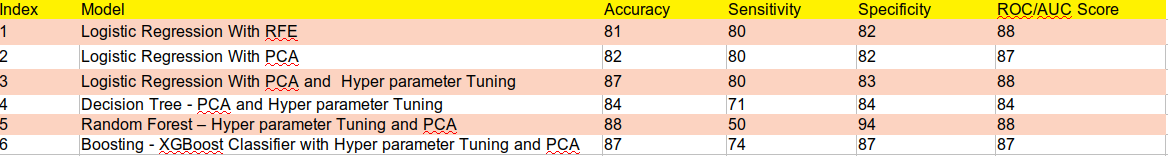

## Step 7 Bussiness Recommendations

The below are the important churn indicators

- Average revenue per user in action phase              -> ('arpu_8')
- roaming usage in action phase                         -> ('roam_ic_mou_8' & 'roam_og_mou_8')
- total incoming for all type of calls in action phase  -> 'total_ic_mou_8'
- last recharge amount in action                        -> 'last_day_rch_amt_8'
- total recharge data                                   -> 'total_rech_data_8'
- Age of the customer                                   -> 'aon'
- total incoming minutes of usage - voice calls diff    -> 'total_ic_mou_diff'
- total recharge amount diff                            -> 'total_rech_amt_diff'
- total roaming incoming & outgong diff                 -> ('roam_ic_mou_diff' & 'roam_og_mou_diff')
- others                                                -> 'loc_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8'

### Interpretation 
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives


Overall, the <b> Logistic Regression model </b>, performs best. It achieved the best recall approx 80% for test data

### Insights
1. The company needs to focus on the STD and ISD rates.The rates seems to be are too high. Provide them with some kind of STD and ISD deals.
2. Telecom company needs to pay attention to the roaming rates and The Network operators must futher investigate their roaming tariffs, and quality of service.
3. It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated